In [5]:
from matplotlib import pyplot as plt
import pandas as pd

import sys, os
sys.path.insert(0, os.path.abspath('../scripts/'))
import footyviz


In [13]:
data = pd.read_csv('../datasets/positional_data/liverpool_2019.csv')
data.tail()

,bgcolor,dx,dy,edgecolor,frame,play,player,player_num,team,x,y,z
72890,blue,0.0,0.0,white,120,Leicester 0 - [3] Liverpool,10267,NaN,defense,98.724826,53.720353,0.0
72891,blue,0.0,0.0,white,121,Leicester 0 - [3] Liverpool,10267,NaN,defense,98.724826,53.720353,0.0
72892,blue,0.0,0.0,white,122,Leicester 0 - [3] Liverpool,10267,NaN,defense,98.724826,53.720353,0.0
72893,blue,0.0,0.0,white,123,Leicester 0 - [3] Liverpool,10267,NaN,defense,98.724826,53.720353,0.0
72894,blue,0.0,0.0,white,124,Leicester 0 - [3] Liverpool,10267,NaN,defense,98.724826,53.720353,0.0


In [14]:
data.play.unique()

array(['Liverpool [3] - 0 Bournemouth', 'Bayern 0 - [1] Liverpool',
       'Fulham 0 - [1] Liverpool', 'Southampton 1 - [2] Liverpool',
       'Liverpool [2] - 0 Porto', 'Porto 0 - [2] Liverpool',
       'Liverpool [4] - 0 Barcelona', 'Liverpool [1] - 0 Wolves',
       'Liverpool [3] - 0 Norwich', 'Liverpool [2] - 1 Chelsea',
       'Liverpool [2] - 1 Newcastle', 'Liverpool [2] - 0 Salzburg',
       'Genk 0 - [3] Liverpool', 'Liverpool [2] - 0 Man City',
       'Liverpool [1] - 0 Everton', 'Liverpool [2] - 0 Everton',
       'Bournemouth 0 - 3 Liverpool', 'Liverpool [1] - 0 Watford',
       'Leicester 0 - [3] Liverpool'], dtype=object)

In [15]:
play = 'Liverpool [4] - 0 Barcelona'
df = data[data.play==play].set_index('frame')
df.tail()

,bgcolor,dx,dy,edgecolor,play,player,player_num,team,x,y,z
frame,,,,,,,,,,,
134,red,0.053492,0.002798,white,Liverpool [4] - 0 Barcelona,24771,NaN,attack,81.482130,56.912439,0.0
135,red,0.047360,0.003669,white,Liverpool [4] - 0 Barcelona,24771,NaN,attack,81.529490,56.916108,0.0
136,red,0.041016,0.004583,white,Liverpool [4] - 0 Barcelona,24771,NaN,attack,81.570506,56.920691,0.0
137,red,0.034459,0.005541,white,Liverpool [4] - 0 Barcelona,24771,NaN,attack,81.604964,56.926231,0.0
138,red,0.027689,0.006542,white,Liverpool [4] - 0 Barcelona,24771,NaN,attack,81.632653,56.932773,0.0


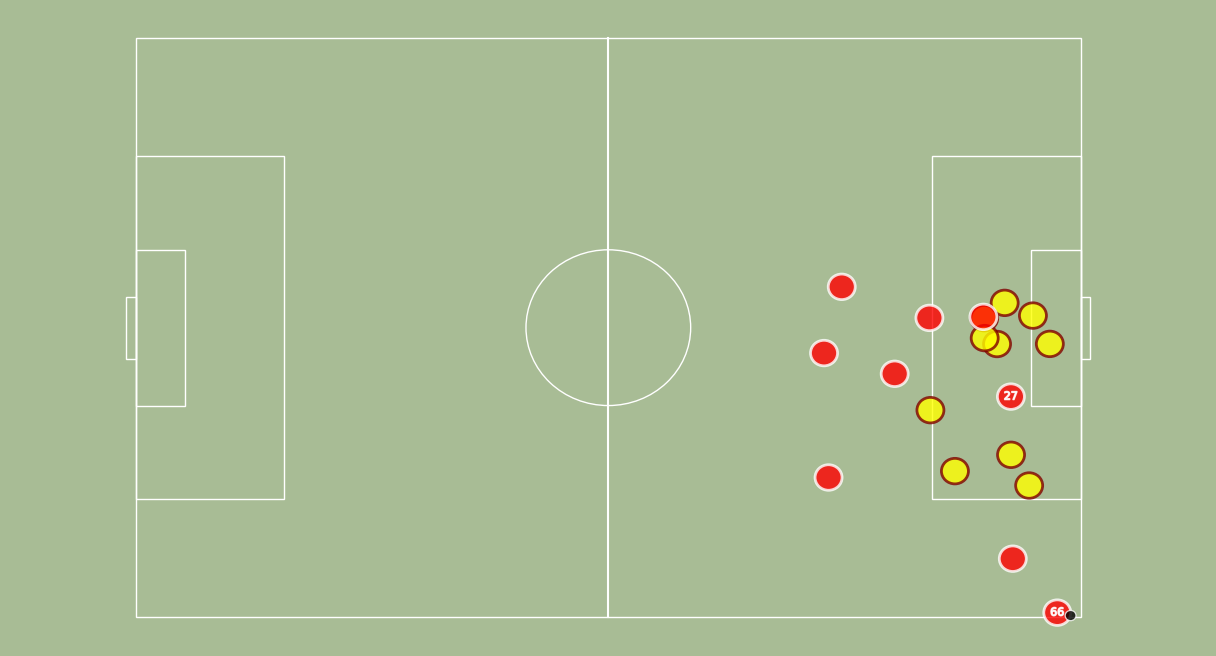

In [8]:
fig, ax, dfFrame = footyviz.draw_frame(df, t=4)

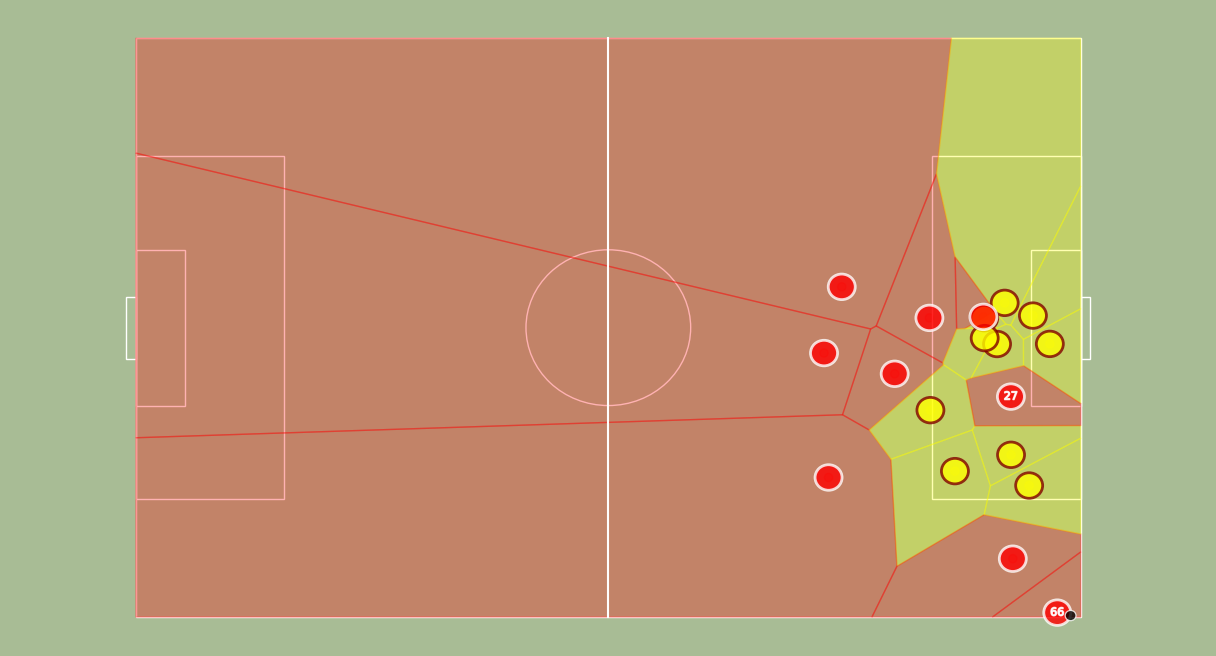

In [9]:
fig, ax, dfFrame = footyviz.draw_frame(df, t=4)
fig, ax, dfFrame = footyviz.add_voronoi_to_fig(fig, ax, dfFrame)

# MoviePy

MoviePy is a Python module for video editing that works nicely with matplotlib and Jupyter and is built on top of FFmpeg. You may think you never used FFMpeg, but you have. From Wikipedia:

> FFmpeg is used by software such as VLC media player, xine, Cinelerra-GG video editor, Plex, Kodi, Blender, HandBrake, YouTube, and MPC-HC; it handles video and audio playback in Google Chrome, and Linux version of Firefox. 

MoviePy documentation: https://zulko.github.io/moviepy/


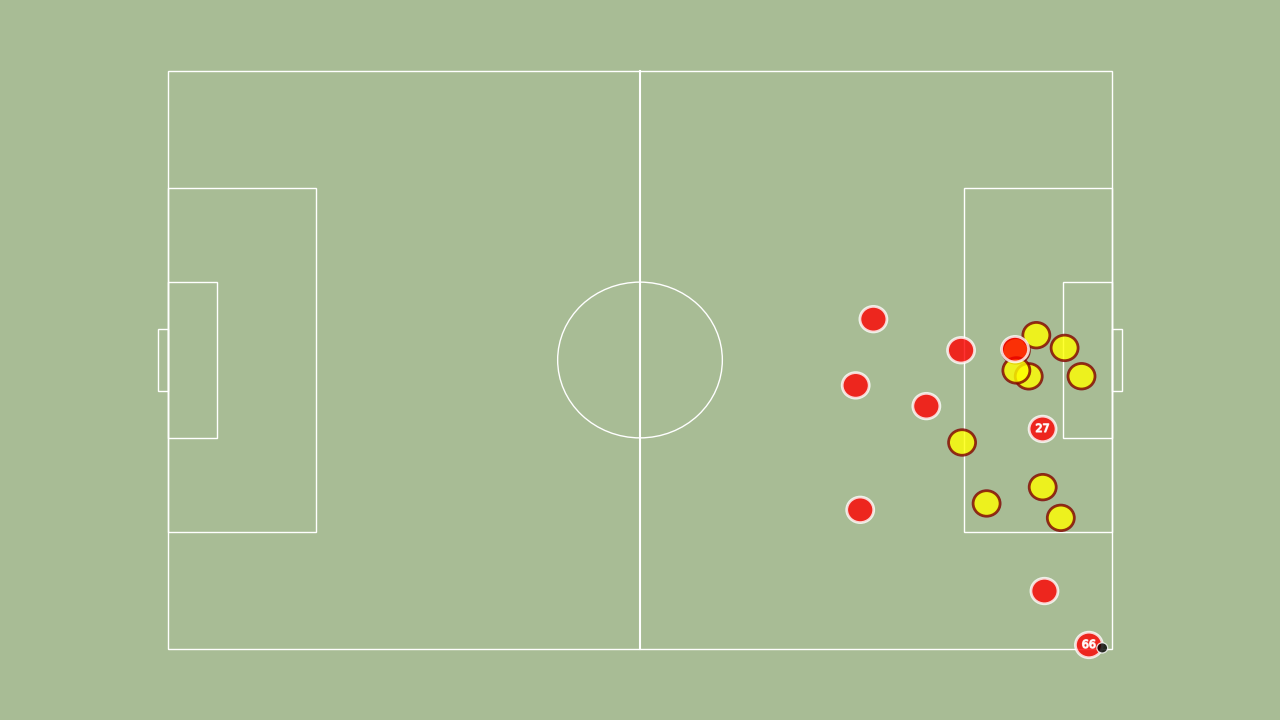

In [43]:
from moviepy import editor as mpy
from moviepy.video.io.bindings import mplfig_to_npimage

def draw_frame_x(df, t, fps):
    fig,ax,dfFrame = footyviz.draw_frame(df, t=t, fps=fps)
    image = mplfig_to_npimage(fig)
    plt.close()
    return image    

def make_animation(df, fps=20, voronoi=False):
    #calculated variables
    length=(df.index.max()+20)/fps
    clip = mpy.VideoClip(lambda x: draw_frame_x(df, t=x, fps=fps), duration=length-1).set_fps(fps)
    return clip

clip = make_animation(df)

clip.ipython_display(t=4)


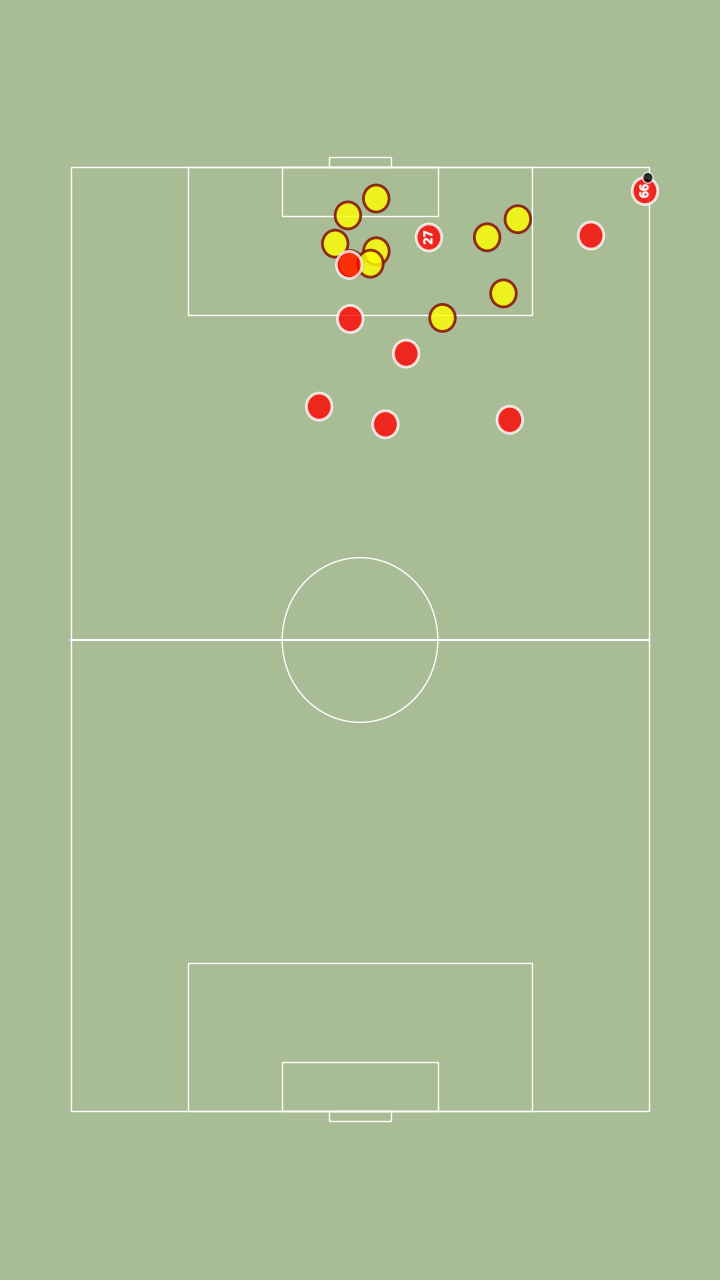

In [50]:
clip.rotate(90).ipython_display(t=4)


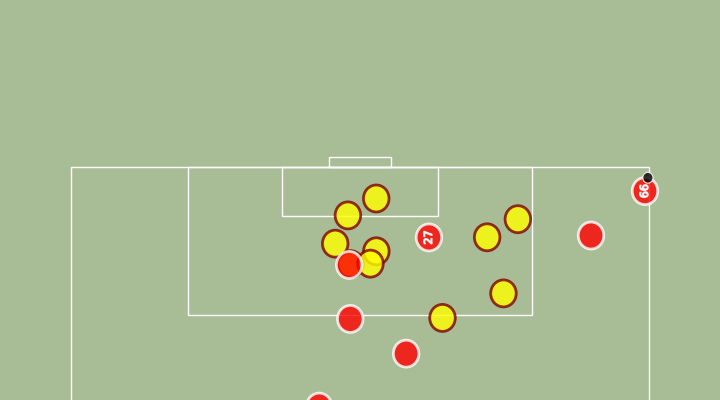

In [54]:
clip.rotate(90).crop(y2=400).ipython_display(t=4)

173.1 seconds



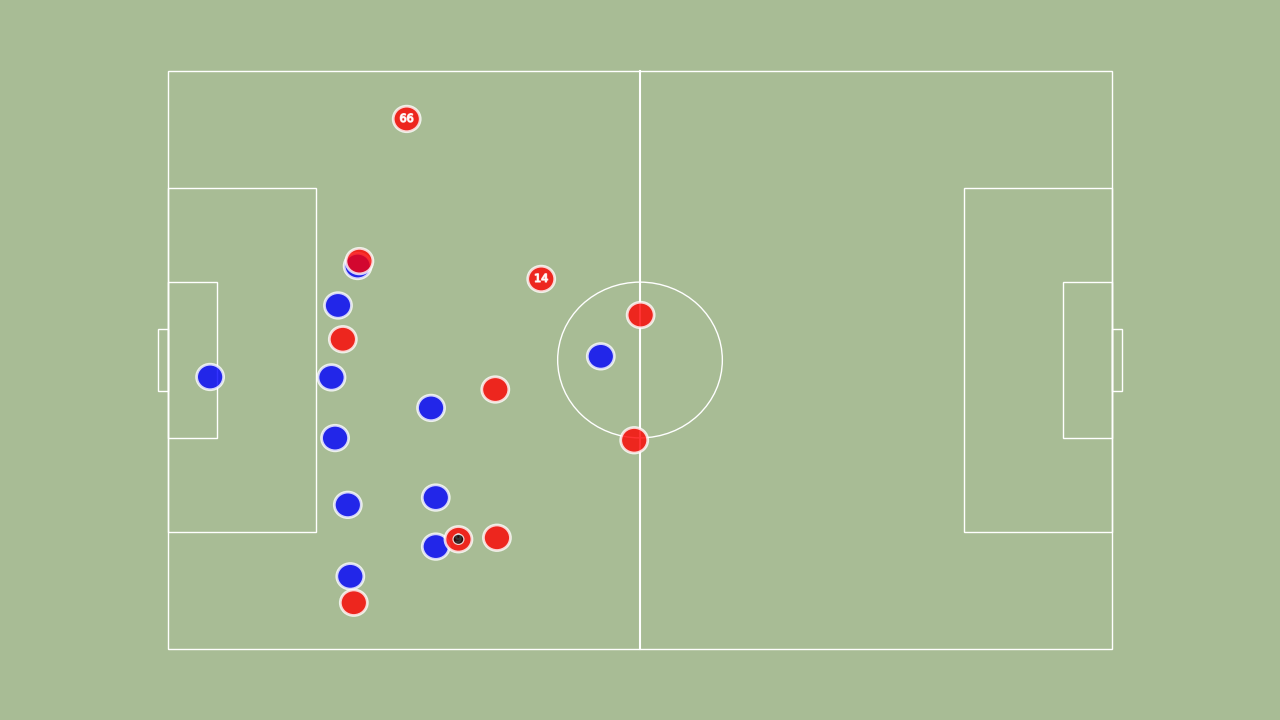

In [45]:
def make_clip_from_play(data, play):
    df = data[data.play==play].set_index('frame')
    clip = make_animation(df)
    return clip

full_clip = mpy.concatenate_videoclips([make_clip_from_play(data, play) for play in data.play.unique()])

print(full_clip.duration, 'seconds')

full_clip.ipython_display(t=40)

In [47]:
full_clip.speedx(2).duration

86.55